## Movies Recommendation System 

A recommendation system is a tool that in recent years many companies had implemented in their common operations. This kind of systems can help in various fields like music, news, books, articles, retail finance, entertainment industry, in general therms tend to increase the page views and retention of the clients.  
The any company that automatically suggest content, services or products it's posible to tell if they use a recommendation system.  

In this practice it'll be used the datasets preseted by Simon Dooms i their repository of Github https://github.com/sidooms/MovieTweetings.  

Simultaneusly it has used some techniques proposed by Jalaj Thanaki.

Then here we go.

In [1]:
import pandas as pd
import numpy as np
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt

## Local load proof

itm_file = pd.read_csv('movies.dat', sep='::', engine='python')
use_file = pd.read_csv('users.dat', sep='::', engine='python')
rat_file = pd.read_csv('ratings.dat', sep='::', engine='python')

itm_file.columns = ['movie_id', 'movie_title', 'genre']
use_file.columns = ['userid', 'twitter_id']
rat_file.columns = ['user_id','movie_id','rating','rating_timestamp']

## Load proofs from an URL

url="https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
c=pd.read_csv(url, sep='::',encoding='utf8'm,error_bad_lines=False,engine='python')
c.columns = ['movie_id', 'movie_title', 'genre']
c

## Beginning  
* Save the URLs in some temporary variable.  
* Convert the dataset that is saved in the temporal variables to Data Frames.  
* Add appropriate names to the columns.

In [2]:
url_items = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
url_ratin = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"
url_users = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/users.dat"

itm_file = pd.read_csv(url_items, sep='::',encoding='utf8',error_bad_lines=False,engine='python')
use_file = pd.read_csv(url_users, sep='::',encoding='utf8',error_bad_lines=False,engine='python')
rat_file = pd.read_csv(url_ratin, sep='::',encoding='utf8',error_bad_lines=False,engine='python')

itm_file.columns = ['movie_id', 'movie_title', 'genre']
use_file.columns = ['userid', 'twitter_id']
rat_file.columns = ['user_id','movie_id','rating','rating_timestamp']

## Items dataset

In [3]:
itm_file.head() 

,movie_id,movie_title,genre
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short
2,25,The Oxford and Cambridge University Boat Race ...,NaN
3,91,Le manoir du diable (1896),Short|Horror
4,131,Une nuit terrible (1896),Short|Comedy|Horror


In [4]:
itm_file.shape

(34523, 3)

It'd be noticed that the column *movie_title* contains other important information furthermore the title. Then it is necessary to put apart the realisation year of the movie in another column. Finally, of course, it is very important to errase characters <<**(**>> and << **)**>>

In [5]:
itm_file['movie_year'] = itm_file['movie_title']

In [6]:
itm_file['movie_title'] = itm_file['movie_title'].str.split('(').str[0]
itm_file['movie_title'] = itm_file['movie_title'].str.strip()
itm_file['movie_year'] = itm_file['movie_year'].str[-6:]

In [7]:
itm_file['movie_year'] = itm_file['movie_year'].str.split('(').str[1]
itm_file['movie_year'] = itm_file['movie_year'].str.split(')').str[0]

In [8]:
itm_file.tail() 

,movie_id,movie_title,genre,movie_year
34518,11108064,Jeff Garlin: Our Man in Chicago,Comedy,2019
34519,11127056,Fire in Paradise,Documentary|Short,2019
34520,11163028,House Arrest,Comedy,2019
34521,11168100,Seth Meyers: Lobby Baby,Comedy,2019
34522,11212096,In Search of the Earth-Mother of Anatolia,NaN,2019


The dataset is almost ready but before at all, it's a good practice to check if there are null values. In this case have null values could mean conflicts in our future transformations.

In [9]:
itm_file.isnull().values.any()

True

In [10]:
itm_file.isnull().sum()

movie_id         0
movie_title      0
genre          280
movie_year       0
dtype: int64

Effectively theres are null values, however it is easy to fill the null values with some other specific value. 

In [11]:
itm_file = itm_file.fillna(value = 'noGenre')

In [12]:
itm_file.head() 

,movie_id,movie_title,genre,movie_year
0,10,La sortie des usines Lumière,Documentary|Short,1895
1,12,The Arrival of a Train,Documentary|Short,1896
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895
3,91,Le manoir du diable,Short|Horror,1896
4,131,Une nuit terrible,Short|Comedy|Horror,1896


In [13]:
itm_file.shape

(34523, 4)

## Users dataset

In [14]:
use_file.head()

,userid,twitter_id
0,2,40501255
1,3,417333257
2,4,138805259
3,5,2452094989
4,6,391774225


In [15]:
use_file.shape

(60469, 2)

In [16]:
use_file = use_file.rename(columns = {'userid':'user_id'})

## Ratings dataset

In [17]:
rat_file.tail()

,user_id,movie_id,rating,rating_timestamp
817075,60468,8695030,1,1567816456
817076,60468,9398640,1,1569026144
817077,60469,816711,8,1371972851
817078,60470,1559547,2,1373287369
817079,60470,2415464,2,1373772560


In [18]:
rat_file.shape

(817080, 4)

As it shows, the rating timestamp has a special format to compress the information about the date and time when the votation has done.  
Then it is vital to convert this information to a format more comprehensible. 

In [19]:
rat_file['rating_timestamp'] = pd.to_datetime(rat_file['rating_timestamp'], unit='s')
rat_file.tail()

,user_id,movie_id,rating,rating_timestamp
817075,60468,8695030,1,2019-09-07 00:34:16
817076,60468,9398640,1,2019-09-21 00:35:44
817077,60469,816711,8,2013-06-23 07:34:11
817078,60470,1559547,2,2013-07-08 12:42:49
817079,60470,2415464,2,2013-07-14 03:29:20


Besides, the column *rating_timestamp* content two fields of information that for our purposes it's more accurate to be used in separated columns, *date* as so *time*.

In [20]:
rat_file = rat_file.rename(columns = {'rating_timestamp':'date'})
rat_file['time'] = rat_file['date'].astype(str)
rat_file['date'] = rat_file['date'].astype(str)

In [21]:
rat_file.time.dtype

dtype('O')

In [22]:
rat_file['date'] = rat_file['date'].str.split(' ').str[0]
rat_file['time'] = rat_file['time'].str[-8:]

In [23]:
rat_file.head()

,user_id,movie_id,rating,date,time
0,1,117060,7,2013-07-10,00:13:51
1,1,120755,6,2013-07-10,02:46:00
2,1,317919,6,2013-07-10,22:36:03
3,1,454876,10,2013-07-12,09:25:25
4,1,790724,8,2013-07-24,04:48:40


## Connecting the datasets  
Nowadays that all three datasets have a well format so it's time to put together two datasets: **ratings** and **items**.

In [24]:
df = rat_file

In [25]:
df.head()

,user_id,movie_id,rating,date,time
0,1,117060,7,2013-07-10,00:13:51
1,1,120755,6,2013-07-10,02:46:00
2,1,317919,6,2013-07-10,22:36:03
3,1,454876,10,2013-07-12,09:25:25
4,1,790724,8,2013-07-24,04:48:40


In [26]:
df['date']=df['date'].astype(str)

In [27]:
df.head()

,user_id,movie_id,rating,date,time
0,1,117060,7,2013-07-10,00:13:51
1,1,120755,6,2013-07-10,02:46:00
2,1,317919,6,2013-07-10,22:36:03
3,1,454876,10,2013-07-12,09:25:25
4,1,790724,8,2013-07-24,04:48:40


In [28]:
df['date']= pd.to_datetime(df['date']) 

In [29]:
df['date'].unique()

array(['2013-07-10T00:00:00.000000000', '2013-07-12T00:00:00.000000000',
       '2013-07-24T00:00:00.000000000', ...,
       '2015-09-25T00:00:00.000000000', '2015-09-30T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
df.head()

,user_id,movie_id,rating,date,time
0,1,117060,7,2013-07-10,00:13:51
1,1,120755,6,2013-07-10,02:46:00
2,1,317919,6,2013-07-10,22:36:03
3,1,454876,10,2013-07-12,09:25:25
4,1,790724,8,2013-07-24,04:48:40


Just to be fair it could be sort by date the rating dataset. 

In [31]:
df = df.sort_values(by='date')
df.reset_index(drop=True, inplace=True)
df.head()

,user_id,movie_id,rating,date,time
0,50594,1446714,10,2013-02-28,19:42:00
1,22328,493464,8,2013-02-28,18:38:41
2,22328,468569,8,2013-02-28,18:37:21
3,22328,467406,7,2013-02-28,18:40:16
4,22328,449088,8,2013-02-28,18:44:06


When the dataset rating is available in other temporal variable then we merge both datasets and the link tha unite the information is the id of each movie. It's important to notice that itsn't recommend to use other column like movie title to make linking step because it could be possible to exist movies with the same name.  

In [32]:
df_2 = pd.merge(df,itm_file, on='movie_id')

In [33]:
df_2.head()

,user_id,movie_id,rating,date,time,movie_title,genre,movie_year
0,50594,1446714,10,2013-02-28,19:42:00,Prometheus,Adventure|Mystery|Sci-Fi,2012
1,28348,1446714,7,2013-03-01,13:26:28,Prometheus,Adventure|Mystery|Sci-Fi,2012
2,44629,1446714,7,2013-03-02,22:59:10,Prometheus,Adventure|Mystery|Sci-Fi,2012
3,23764,1446714,6,2013-03-05,17:35:03,Prometheus,Adventure|Mystery|Sci-Fi,2012
4,16651,1446714,7,2013-03-07,12:14:14,Prometheus,Adventure|Mystery|Sci-Fi,2012


Finally we add the last dataset, the user information dataset. The linked column is the user id.  
Until now we have constructed a better and robust dataset that contains important information and in the future it's posible to extract more external information using the twitter api.

In [34]:
df_final =pd.merge(df_2, use_file, on='user_id')
df_final = df_final.sort_values(by='date')
df_final.reset_index(drop=True, inplace=True)
df_final.tail()

,user_id,movie_id,rating,date,time,movie_title,genre,movie_year,twitter_id
817684,46716,1758692,7,2019-11-21,01:35:24,Like Crazy,Drama|Romance,2011,593070997
817685,38378,7286456,10,2019-11-21,20:06:34,Joker,Crime|Drama|Thriller,2019,1683965072
817686,47567,4729430,8,2019-11-21,15:22:35,Klaus,Animation|Adventure|Comedy|Family,2019,1163585270220042241
817687,36841,4729430,8,2019-11-21,13:27:45,Klaus,Animation|Adventure|Comedy|Family,2019,3173463026
817688,15840,2140479,9,2019-11-22,00:02:48,The Accountant,Action|Crime|Drama|Thriller,2016,635733585


The only column that looks different in this new dataset is the genre column, so it'll try to change it.  Whit this in mind the idea is to change all this information contained in just one column to multiple categorical columns. Moreover it'll have one column for each genre and according to the genres of each movie this columns could be marqued with 1 if they have the genre and 0 in the oposite case.

In [35]:
df_cross = pd.DataFrame(df_final.genre)

numeration = int(len(df_final))+1
df_cross['id'] = pd.Series(range(1,numeration))

The first step is to create a dataset that only contains the column genre and another column that in this case it called id and this is just an enummeration of each register. It is necessary because in the future transformation it'll be helpful to the purposes.

In [36]:
df_cross.head()

,genre,id
0,Adventure|Mystery|Sci-Fi,1
1,Action|Drama|Mystery|Sci-Fi,2
2,Comedy|Romance,3
3,Mystery|Thriller,4
4,Drama|Romance,5


Now here happens the magic. Using the Id of each register it tries to split the values saved in each row of the genre column. On average it could takes between 4-6 minutes to execute this process. (If anyone knows about a more efficient way, please contact to me to fix it)

In [37]:
newdf_cross = pd.concat([pd.Series(row['id'], row['genre'].split('|'))
           for _, row in df_cross.iterrows()]).reset_index()

In [38]:
newdf_cross.columns

Index(['index', 0], dtype='object')

In [39]:
new_dfcross = pd.crosstab(newdf_cross[0], newdf_cross['index'])

In [40]:
new_dfcross.head()

index,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,noGenre
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


It's posible to look how many and wich are the genres of the films in this dataset as follows.

In [41]:
new_dfcross.columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'noGenre'],
      dtype='object', name='index')

Lastly we merge both datasets to have a more robust information.

In [42]:
result = pd.merge(df_final.reset_index(),
                  new_dfcross.reset_index(), 
                  left_index=True, 
                  right_index=True)
result.head()

,index,user_id,movie_id,rating,date,time,movie_title,genre,movie_year,twitter_id,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,noGenre
0,0,50594,1446714,10,2013-02-28,19:42:00,Prometheus,Adventure|Mystery|Sci-Fi,2012,951692364,...,0,0,1,0,0,0,0,0,0,0
1,1,49333,1371111,6,2013-02-28,16:08:29,Cloud Atlas,Action|Drama|Mystery|Sci-Fi,2012,15835543,...,0,0,1,0,0,0,0,0,0,0
2,2,28606,1920849,7,2013-02-28,19:34:59,Bachelorette,Comedy|Romance,2012,23654986,...,0,1,0,0,0,0,0,0,0,0
3,3,9616,209144,10,2013-02-28,23:07:08,Memento,Mystery|Thriller,2000,610685478,...,0,0,0,0,0,0,1,0,0,0
4,4,13068,462683,8,2013-02-28,17:06:50,L'homme de sa vie,Drama|Romance,2006,137260735,...,0,1,0,0,0,0,0,0,0,0


In [43]:
result.columns

Index([      'index',     'user_id',    'movie_id',      'rating',
              'date',        'time', 'movie_title',       'genre',
        'movie_year',  'twitter_id',             0,      'Action',
             'Adult',   'Adventure',   'Animation',   'Biography',
            'Comedy',       'Crime', 'Documentary',       'Drama',
            'Family',     'Fantasy',   'Film-Noir',   'Game-Show',
           'History',      'Horror',       'Music',     'Musical',
           'Mystery',        'News',  'Reality-TV',     'Romance',
            'Sci-Fi',       'Short',       'Sport',   'Talk-Show',
          'Thriller',         'War',     'Western',     'noGenre'],
      dtype='object')

In [44]:
result = result.drop(['index'], axis=1)
result = result.drop([0], axis=1)
result.head()

,user_id,movie_id,rating,date,time,movie_title,genre,movie_year,twitter_id,Action,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,noGenre
0,50594,1446714,10,2013-02-28,19:42:00,Prometheus,Adventure|Mystery|Sci-Fi,2012,951692364,0,...,0,0,1,0,0,0,0,0,0,0
1,49333,1371111,6,2013-02-28,16:08:29,Cloud Atlas,Action|Drama|Mystery|Sci-Fi,2012,15835543,1,...,0,0,1,0,0,0,0,0,0,0
2,28606,1920849,7,2013-02-28,19:34:59,Bachelorette,Comedy|Romance,2012,23654986,0,...,0,1,0,0,0,0,0,0,0,0
3,9616,209144,10,2013-02-28,23:07:08,Memento,Mystery|Thriller,2000,610685478,0,...,0,0,0,0,0,0,1,0,0,0
4,13068,462683,8,2013-02-28,17:06:50,L'homme de sa vie,Drama|Romance,2006,137260735,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
itm_file.movie_id.unique().shape

(34521,)

In [46]:
result.movie_id.unique().shape

(34521,)

## Get the count and mean   
The next step is to calculate the total of votes made by each user for the different movies. So, for this purpose we use a temporal variable that refeers the original item dataset. And after that the next step, using the result dataset, we'll get the information counting all the voted films. 

In [47]:
mv_df = itm_file

In [48]:
tes_coid = pd.DataFrame(data = pd.value_counts(result[['movie_id']].values.ravel()),columns=['count'])
tes_coid.shape
tes_coid.reset_index(level=0, inplace=True) 
tes_coid.columns = ['movie_id','count']

In [49]:
tes_coid.head()

,movie_id,count
0,1454468,3067
1,816692,2748
2,993846,2737
3,770828,2663
4,816711,2402


Now it is available the dataset that contains the information of how many votes has for each movie. Just for demostrative pusposes below it shows an espefic title and how it looks, theres are only 3 votes an a mean of 6.33. 

In [50]:
dolar = result['movie_title'] == '$'
result_dolar = result[dolar]
result_dolar

,user_id,movie_id,rating,date,time,movie_title,genre,movie_year,twitter_id,Action,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,noGenre
20675,47444,68152,8,2013-04-07,22:16:20,$,Comedy|Crime|Drama,1971,14782875,0,...,0,0,0,0,0,0,0,0,0,0
230030,4261,68152,7,2014-04-18,12:41:46,$,Comedy|Crime|Drama,1971,78128381,0,...,0,0,0,0,0,0,0,0,0,0
375251,17105,68152,4,2015-04-25,03:05:01,$,Comedy|Crime|Drama,1971,532582706,0,...,0,0,0,0,0,0,0,0,0,0


The the next step is to achieve the rating average of each title. This is posible just grouped the date in id information and then making the mean of all register of this new column.

In [51]:
grouped_data = result.groupby('movie_id')
rating = pd.DataFrame(grouped_data['rating'].mean().round(2))
rating.reset_index(level=0, inplace=True) 
rating.head()

,movie_id,rating
0,10,10.0
1,12,10.0
2,25,8.0
3,91,6.0
4,131,7.0


In [52]:
rating.shape

(34521, 2)

Finally it is posible to merge the three datasets: the test_coid dataset, the rating dataset and the mv_df dataset. At the end we can observe a dataset more or less similar to the ortiginal item dataset but with two new columns: count and rating.

In [53]:
tes_coid = pd.merge(tes_coid,rating, on='movie_id',how='outer')
tes_coid = pd.merge(mv_df,tes_coid, on='movie_id',how='outer')
tes_coid.head()

,movie_id,movie_title,genre,movie_year,count,rating
0,10,La sortie des usines Lumière,Documentary|Short,1895,1,10.0
1,12,The Arrival of a Train,Documentary|Short,1896,1,10.0
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895,1,8.0
3,91,Le manoir du diable,Short|Horror,1896,3,6.0
4,131,Une nuit terrible,Short|Comedy|Horror,1896,1,7.0


## Construct a simple recommendation system  
The implementation of this model is very trivial.  
Depending to some values it is posible to assing a weight to decide how well or bad a film goes in the opinion of the people. 

* The basic idea behind this system is that movies with a higher probablitiy of being liked by the average audience are more popular in a measurable therms.

### *Weighted Rating (WR)* = ($\frac{v}{v+m}*R$) + ($\frac{m}{v+m}*C$)  
Where:  
  * v is the number of votes for the movie
  * m is the minimum votes required to be listed in the chart
  * R is the average rating of the movie
  * C is the mean vote across the whole report

In [54]:
vote_counts = tes_coid[tes_coid['count'].notnull()]['count'].astype('int')
vote_avergs = tes_coid[tes_coid['rating'].notnull()]['rating'].astype('int')
C = vote_avergs.mean()
C

6.460736320713727

In [55]:
m= vote_counts.quantile(0.95)
m

89.90000000000146

In [56]:
qualified = tes_coid[(tes_coid['count'] >= m) &
                  (tes_coid['count'].notnull())&
                  (tes_coid['rating'].notnull())][['movie_title',
                                                'movie_year',
                                                'count',
                                                'rating',
                                                'genre']]
qualified['count'] = qualified['count'].astype('int')
qualified['rating'] = qualified['rating'].astype('int')
qualified.shape

(1727, 5)

In [57]:
def weighted_rating(x):
    V = x['count']
    R = x['rating']
    return (V/(V+m) * R) +(m/(m+V) * C)

In [58]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [59]:
qualified = qualified.sort_values('wr', ascending = False).head(250)

### Top Movies

In [60]:
qualified.head(15)

,movie_title,movie_year,count,rating,genre,wr
33196,Joker,2019,2249,9,Crime|Drama|Thriller,8.902399
28651,Avengers: Endgame,2019,1363,9,Action|Adventure|Fantasy|Sci-Fi,8.842880
8427,The Shawshank Redemption,1994,998,9,Drama,8.790165
17996,Inception,2010,875,9,Action|Adventure|Sci-Fi|Thriller,8.763416
8273,Forrest Gump,1994,774,9,Drama|Romance,8.735757
2038,12 Angry Men,1957,691,9,Crime|Drama,8.707671
14479,The Dark Knight,2008,665,9,Action|Crime|Drama|Thriller,8.697603
3893,The Godfather,1972,593,9,Crime|Drama,8.665720
9480,The Green Mile,1999,438,9,Crime|Drama|Fantasy|Mystery,8.567570
8120,Schindler's List,1993,415,9,Biography|Drama|History,8.547871


**Note:** This is the principal reason why itsn't correct to use the *movie_title* instead the *movie_id*. Here, we observe that exist two diferents movies with the same title.

In [61]:
joker = itm_file['movie_title'] == 'Joker'
df_joker = itm_file[joker]
df_joker

,movie_id,movie_title,genre,movie_year
21116,1918886,Joker,Comedy|Family|Sci-Fi,2012
33196,7286456,Joker,Crime|Drama|Thriller,2019


In [62]:
itm_file['movie_id'].unique().shape

(34521,)

In [63]:
itm_file['movie_title'].unique().shape

(33128,)

## Construct list of movies depending in the genre  
To do this new aprochment it's necessary to separete the genre column in each value of the movies. Then those are availables.
Finally our function that builds charts for particular genres is posible to declare.

In [64]:
s = tes_coid['genre'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
tes_coid.join(s.apply(lambda x: pd.Series(x.split('|'))))
tes_coid = tes_coid.join(s)
tes_coid.head()

,movie_id,movie_title,genre,movie_year,count,rating,genres
0,10,La sortie des usines Lumière,Documentary|Short,1895,1,10.0,Documentary
0,10,La sortie des usines Lumière,Documentary|Short,1895,1,10.0,Short
1,12,The Arrival of a Train,Documentary|Short,1896,1,10.0,Documentary
1,12,The Arrival of a Train,Documentary|Short,1896,1,10.0,Short
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895,1,8.0,noGenre


In [65]:
def build_chart(genre,percentile = 0.85):
    df = tes_coid[tes_coid['genres'] == genre]
    vote_counts = df[df['count'].notnull()]['count'].astype('int')
    vote_averag = df[df['rating'].notnull()]['rating'].astype('int')
    C = vote_averag.mean()
    m = vote_counts.quantile(percentile)
    qualified = df[(df['count']>=m)&
                   (df['count'].notnull()) &
                   (df['rating'].notnull())][['movie_title',
                                              'movie_year',
                                              'count',
                                              'rating',
                                              'genre']]
    qualified['count'] = qualified['count'].astype('int')
    qualified['rating'] = qualified['rating'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x:(x['count']/(x['count']+m)*x['rating'])+(m/(m+x['count'])*C), axis = 1)
    qualified = qualified.sort_values('wr', ascending = False).head(250)
    

    return qualified

### Top 15 Movies according to the genre  
Try to change the genre in the code below.

In [66]:
build_chart('Sci-Fi').head(15)

,movie_title,movie_year,count,rating,genre,wr
28651,Avengers: Endgame,2019,1363,9,Action|Adventure|Fantasy|Sci-Fi,8.853379
17996,Inception,2010,875,9,Action|Adventure|Sci-Fi|Thriller,8.777423
7644,Terminator 2: Judgment Day,1991,234,9,Action|Sci-Fi,8.303429
18413,Gravity,2013,3067,8,Drama|Sci-Fi|Thriller,7.954477
15341,Interstellar,2014,2748,8,Adventure|Drama|Sci-Fi,7.949319
18077,Mad Max: Fury Road,2015,1911,8,Action|Adventure|Sci-Fi|Thriller,7.927873
18154,Star Trek Into Darkness,2013,1879,8,Action|Adventure|Sci-Fi,7.926687
18284,Deadpool,2016,1843,8,Action|Adventure|Comedy|Sci-Fi,7.925305
20493,Her,2013,1772,8,Drama|Romance|Sci-Fi,7.922421
20970,X-Men: Days of Future Past,2014,1752,8,Action|Adventure|Sci-Fi|Thriller,7.921568


## Content based recommendation system

To construct a content based recommendation system is necessary more information. The better option to begin in this project is with the item dataset thus there we can found movie id but, how much special could be this id?

In [67]:
original = itm_file
temp = original.head()

In [68]:
temp.head()

,movie_id,movie_title,genre,movie_year
0,10,La sortie des usines Lumière,Documentary|Short,1895
1,12,The Arrival of a Train,Documentary|Short,1896
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895
3,91,Le manoir du diable,Short|Horror,1896
4,131,Une nuit terrible,Short|Comedy|Horror,1896


As it's posible to see above it seems like normal ids but it is not. Let me explain:

I thank to Simon Dooms (Github @sidooms) because the offer the very curated datasets that we use until now. Besides he explain that all the ids of the movies are also part of page link of each movie. Then with this information it's just necessary to normalize the movie_id column and add the other part of the page link that will be:  
http://www.imdb.com/title/tt  
All the links refers to the page of IMBD and from that using some Web Scraping techniques it's posible to obtain more information. It will be our next objetive.  
However, we can't use the movie_id column as we have right now. I find that the correct format is a number with seven characters and if they have less it's necessary to fill with 0 (zeros) at left. Then here we use zfill to fix it.

In [69]:
'10'.zfill(7)

'0000010'

In [70]:
temp['count_mv_id'] = temp['movie_id'].astype(str).str.len()
temp['tr_movie_id'] = temp['movie_id'].astype(str)
temp['tr_movie_id'] = temp['tr_movie_id'].str.zfill(7)

C:\Users\alter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alter\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [71]:
temp.head()

,movie_id,movie_title,genre,movie_year,count_mv_id,tr_movie_id
0,10,La sortie des usines Lumière,Documentary|Short,1895,2,0000010
1,12,The Arrival of a Train,Documentary|Short,1896,2,0000012
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895,2,0000025
3,91,Le manoir du diable,Short|Horror,1896,2,0000091
4,131,Une nuit terrible,Short|Comedy|Horror,1896,3,0000131


In [72]:
temp['movie_id'] 

0     10
1     12
2     25
3     91
4    131
Name: movie_id, dtype: int64

In [73]:
temp['url_imbd'] = 'http://www.imdb.com/title/tt'+temp['tr_movie_id']

C:\Users\alter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
temp.head()

,movie_id,movie_title,genre,movie_year,count_mv_id,tr_movie_id,url_imbd
0,10,La sortie des usines Lumière,Documentary|Short,1895,2,0000010,http://www.imdb.com/title/tt0000010
1,12,The Arrival of a Train,Documentary|Short,1896,2,0000012,http://www.imdb.com/title/tt0000012
2,25,The Oxford and Cambridge University Boat Race,noGenre,1895,2,0000025,http://www.imdb.com/title/tt0000025
3,91,Le manoir du diable,Short|Horror,1896,2,0000091,http://www.imdb.com/title/tt0000091
4,131,Une nuit terrible,Short|Comedy|Horror,1896,3,0000131,http://www.imdb.com/title/tt0000131


At this point of the process the url are all correct and now they are available to be used in web scraping techniques.

In [75]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [76]:
url = "http://www.imdb.com/title/tt0000010"
html = urlopen(url)

In [77]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [78]:
title = soup.title
print(title)

<title>La sortie de l'usine Lumière à Lyon (1895) - IMDb</title>


Working on it...

# Vizualization

In [151]:
neuf = rat_file
neuf.describe()

,user_id,movie_id,rating
count,817080.000000,8.170800e+05,817080.000000
mean,30238.106427,2.019199e+06,7.304211
std,17276.247931,1.748650e+06,1.855595
min,1.000000,8.000000e+00,0.000000
25%,15465.000000,7.654460e+05,6.000000
50%,30274.000000,1.675434e+06,7.000000
75%,45026.000000,2.674426e+06,9.000000
max,60470.000000,1.121210e+07,10.000000


In [152]:
neuf.head()

,user_id,movie_id,rating,date,time
0,1,117060,7,2013-07-10,00:13:51
1,1,120755,6,2013-07-10,02:46:00
2,1,317919,6,2013-07-10,22:36:03
3,1,454876,10,2013-07-12,09:25:25
4,1,790724,8,2013-07-24,04:48:40


In [153]:
neuf['rating'].unique()

array([ 7,  6, 10,  8,  9,  5,  3,  1,  4,  2,  0], dtype=int64)

In [154]:
tmp =neuf['rating'].astype('int')
p_viz = pd.DataFrame(tmp)
p_viz['period'] = neuf[['date', 'time']].astype(str).apply(lambda x: ' '.join(x), axis=1)
#p_viz['period'] = result['date']+' '+result['time']

p_viz.head()

,rating,period
0,7,2013-07-10 00:13:51
1,6,2013-07-10 02:46:00
2,6,2013-07-10 22:36:03
3,10,2013-07-12 09:25:25
4,8,2013-07-24 04:48:40


In [155]:
p_viz.dtypes

rating     int32
period    object
dtype: object

In [156]:
#p_viz['rating'] = p_viz['rating']
p_viz['period'] = pd.to_datetime(p_viz['period'])

In [157]:
p_viz = p_viz.set_index(p_viz['period'])
p_viz = p_viz.drop(['period'], axis=1)
#df.set_index(pd.to_datetime(df['Date']))

In [158]:
p_viz.dtypes

rating    int32
dtype: object

In [159]:
p_viz.resample('15T').last()

,rating
period,
2013-02-28 14:30:00,8.0
2013-02-28 14:45:00,7.0
2013-02-28 15:00:00,9.0
2013-02-28 15:15:00,7.0
2013-02-28 15:30:00,7.0
2013-02-28 15:45:00,5.0
2013-02-28 16:00:00,8.0
2013-02-28 16:15:00,8.0
2013-02-28 16:30:00,10.0


Distribution of the rating along the time.

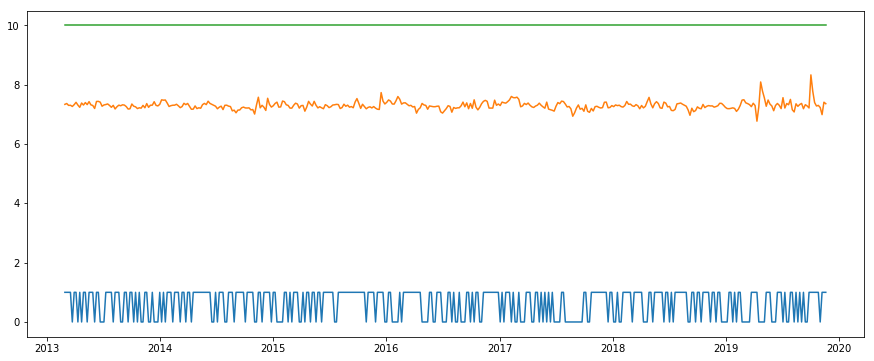

In [183]:
plt.figure(figsize=(15,6))
plt.plot(p_viz.resample('6D').agg(['min','mean','max']))

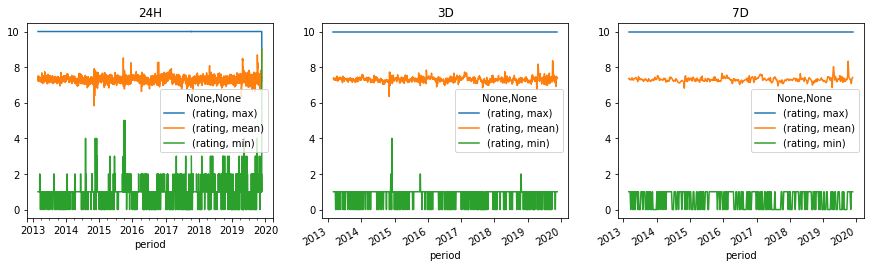

In [178]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i, freq in enumerate(['24H','3D','7D']):
    p_viz.resample(freq).agg(['max','mean','min']).plot(ax= axes[i], title=freq)

# Playground area

In [ ]:
import pandas as pd
df = pd.DataFrame(['a b c']*100000, columns=['col'])
df.head()

In [ ]:
print (pd.DataFrame(dict(zip(range(3), [df['col'].apply(lambda x : x.split(' ')[i]) for i in range(3)]))).head())

In [ ]:
s = pruebas['genre'].str.split('|')
s

In [ ]:
q = pruebas['genre'].str.split('|').tolist()
q

In [ ]:
pd.DataFrame(dict(zip(range(16), [pruebas['genre'].apply(lambda x : x.split('|')[i]) for i in range(2)])))

In [ ]:
s = pruebas['genre'].str.split('|').apply(pd.Series, 1).stack()
s

In [ ]:
s.index = s.index.droplevel(-1)
s.name = 'genres'
s